# A little notebook on python functions


To perform more complex operations on data, you will be frequently using two mechanisms made available by the Python language: functions and methods. 

You have already come across and used both functions and methods written by others during the course (Standing on the shoulders of giants!) these have included: type(), len(), float(), print() and range() (note the () after each function call).

The general syntax of a function call is:

    function_name(function_arguments)
    
and we will obtain the result of the function operation on the argument. In the example
    
    len("Hello")
    
Run the len() function with any string argument below, what does the function return?

In [1]:
len("Hello") 

5

What happens if your argument is a list?

In [2]:
len([1,2,3,4])

4

since the len() function is already defined for a set of valid non-scalar arguments, we need not redefine it for every argument seperately. What happens if your argument is scalar? Try it below.

In [3]:
len(6)

TypeError: object of type 'int' has no len()

## Redefining the len() function from scratch

len() is an in-built python function, and is automatically "imported" with each python script. Let's re-write the len() function by defining a new function with the same name.

To define a function we use the `def` keyword to start the function header, the function's logic is written underneath the header with indentation, the function definition is complete with the `return` keyword which outputs the result of the function. The general syntax looks like this:

```
def function_name(function_arguments):

    '''doc string describing function'''
    
    result = do some stuff with function_arguments 
    
    return result
```

An example function f below takes an argument x and returns y, we can use this function to calculate y values from a set of x values for $y=x^2$

In [4]:
def f(x):
    '''Return x^2'''
    y = x**2
    return y

Note how python keywords are highlighted with the same green colour (`def` and `return`)

### Using the function f, numpy and matplotlib, plot a graph of $y=x^2$ between $x=-10$ and $x=10$ 

In [5]:
#ANSWER
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10,10)
y = f(x)

plt.plot(x,y)

### Now that we know how functions are defined, redefine len() below using one for loop. Assume only iterable arguments will be passed through the function.

In [7]:
def len(x):
    length = 0
    for i in x:
        length +=1
    return length

In [8]:
len('hello')

5

### Import from [scipy stats](https://docs.scipy.org/doc/scipy/reference/stats.html) a package that will allow you to perform linear regression. 

In [9]:
from scipy.stats import linregress

Write a function that will return the following equation from arguments of x, A and B: 

$y = (A+x^2)B$

In [10]:
def func(A,x,B):
    return (A+x**2)*B

Create the variable $x$ which is an array of 100 equally spaced values ranging from 0 to 100.

In [11]:
x = np.linspace(0,100,100)

Compute the $y$ values using your function, your $x$ array and an arbitary integer choice for $A$ and $B$

In [12]:
y = func(2,x,8)

Create an array called Adat, containing 8 equally spaced values between 0 and 10000.

In [13]:
Adat = np.linspace(0,10000,8)

Create an array called Bdat, containing 8 equally spaced values between 0 and 10000.

In [14]:
Bdat = np.linspace(0,10000,8)

Create a new list of all the possible combinations of A and B values from your Adat and Bdat arrays, assign that list to a variable called AB.

Tip: use [itertools.product](https://docs.python.org/2/library/itertools.html#itertools.product), a handy library function for cartesian product

In [15]:
from itertools import product

AB = list(product(Adat,Bdat))
len(AB)

64

Iterate through each combination in AB and plot all 64 function results for each A and B with the x values from your x array.

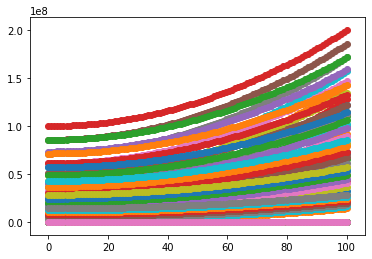

In [16]:
for val in AB:
    A = val[0]
    B = val[1]
    y = func(A,x,B)
    plt.scatter(x,y)
plt.show()

Rerun the for loop, appending each of your y arrays to an empty list called proxydat. 

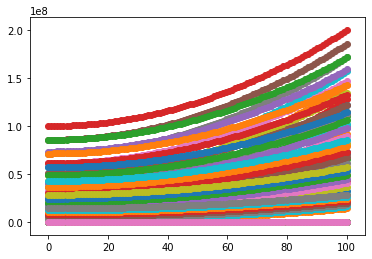

In [17]:
proxydat = []
for val in AB:
    A = val[0]
    B = val[1]
    y = func(A,x,B)
    plt.scatter(x,y)
    proxydat.append(y)
plt.show()

Convert proxyydat into a numpy array and save this as a [.npy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) file called finalydat.

In [18]:
finalydat = np.array(proxydat)
np.save('finalydat',finalydat)

Before moving forward, ensure that the shape of finalydat is (64, 100). 

In [19]:
finalydat.shape

(64, 100)

Given the following, complete the following for loop such that it will return three markers (use a large size, i.e. (s = 100)) plotting the minimum, mean and max of each curve. Rerun your previous for loop after this loop and use plt.show() to place both plots on a single output. 

### Harder challenges

In [20]:
center = x[57]
minx = np.min(x)
maxx = np.max(x)

xplot = [minx,center,maxx]



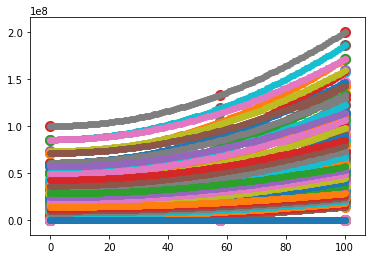

In [23]:
#ANSWER

center = x[57]
minx = np.min(x)
maxx = np.max(x)

xplot = [minx,center,maxx]

for i in range (0,64):
    meany = np.mean(finalydat[i])
    miny = np.min(finalydat[i])
    maxy = np.max(finalydat[i])
    
    yplot = [miny, meany,maxy]
    
    plt.scatter(xplot,yplot, s = 100)
    
for val in AB:
    A = val[0]
    B = val[1]
    y = func(A,x,B)
    plt.scatter(x,y)
    
plt.show()

## Multi-argument functions and default values

For each function, you can have multiple arguments or none, that is a choice entirely made by the programmer, usually, the more arguments a function can take, the more flexible/generalised the function is. 

The function `sin3df` below generates the $z$ values and returns the 3d co-ordinates from a set of given $x$ and $y$ values for the 3d Sine function.
 
Using this function, plot a [contour graph](https://matplotlib.org/3.1.1/tutorials/toolkits/mplot3d.html) of $z=sin(x,y)$ between $x=-6$, $x=6$, $y=-6$, $y=6$ 

In [24]:
%matplotlib notebook

def sin3df(x,y):
    X, Y = np.meshgrid(x,y)
    Z = np.sin(np.sqrt(X ** 2 + Y ** 2))
    return X, Y, Z

<IPython.core.display.Javascript object>


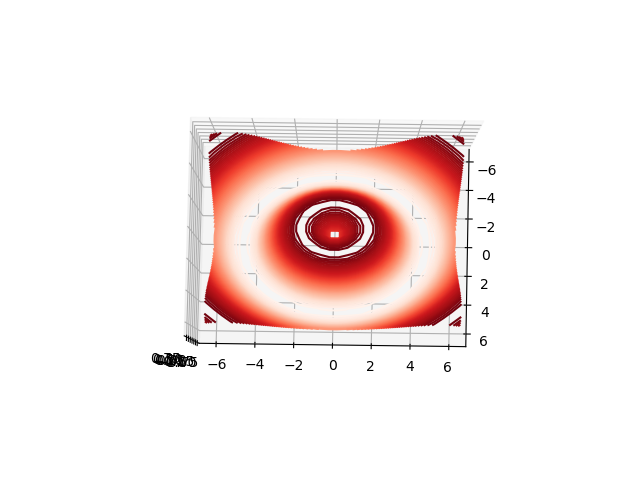

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)
X, Y, Z = sin3df(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X,Y,Z, 50, cmap='Reds')

### Default values

You can set default values in the function definition such that they need not be reinserted for each function call, they can still be changed and explicitly defined in the function call as well. 

In [26]:
def listof2(n1=5,n2=6):
    return [n1,n2]

In [27]:
listof2()

[5, 6]

In [28]:
listof2(3,4)

[3, 4]

In [29]:
listof2(n2=3,n1=4)

[4, 3]

## A digression on recursive functions and functional programming

### Functional programming

In this programming paradigm, functions are not just a way to organise instructions, they form the entire logic of the program. One of the characteristics of this programming style is that functions don't have to receive just data as input but they can receive other functions as arguments; making the whole program a complex function of functions.

Python is not a good language to do functional programming, but it has some of its features. We could write a simple square root example program as:

In [37]:
def sqroot(n):
    return n**0.5

list(map(sqroot,range(1,11)))

[1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0,
 3.1622776601683795]

### Recursion

Recursion allows a function to call itself such that for each iteration of function calling, the function logic is applied to a partially solved problem.

In [39]:
def sqrt(x):
    if x==[]:
        return []
    else:
        return sqrt(x[:-1])+[x[-1]**0.5]
            
sqrt(list(range(1,11)))

[1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0,
 3.1622776601683795]

### Write a function that utilises recursion to compute the factorial of an integer

In [40]:
def facto(n):
    if n == 2:
        return n
    else:
        return n*facto(n-1)

In [41]:
facto(7)

5040

## The sock pairing problem

You have just done your washing and need to pair your socks. You know the colours of each of the socks in the pile, but you also know that some socks are missing a pair.

Complete the sockpairs function below such that when you run the line below it, the example output will be shown. It must accept a list argument of all the socks' colours in the pile (indicated by same numbers) and return an integer representing the number of matching pairs of socks that are available.

```
Example input:
    ar=[1,1,2,4,3,5,4,4,5,6,6,7,3]
Example output:
    5
```

In [42]:
#This problem is from https://www.hackerrank.com/challenges/sock-merchant/problem There are plenty more practice questions on the website.

In [8]:
from collections import Counter


def sockpairs(ar):
    num_p=0
    for values in Counter(ar).values():
        num_p+=values//2
    return num_p

In [11]:
#Test your function using the example input 
ar=[1,1,2,4,3,5,4,4,5,6,6,7,3]
sockpairs(ar)

5